In [1]:
from pathlib import Path
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import PIL # type: ignore
import torch # type: ignore
import torch.nn as nn # type: ignore
import torchvision.models.vgg as models # type: ignore
import torchvision.transforms as transforms # type: ignore
from torch.utils.data import TensorDataset, DataLoader, Dataset # type: ignore

normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std  = [0.229, 0.224, 0.225]
    )
])

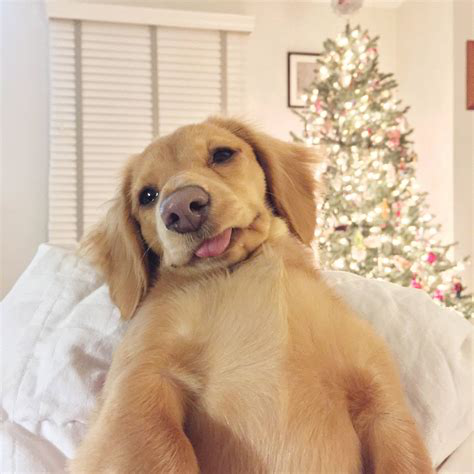

In [2]:
fn = Path('../data/raw/dog_derp_big.jpeg')
img = PIL.Image.open(fn)
img

In [3]:
img_array = np.array(img)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16  = models.vgg16(pretrained = True).to(device)

In [5]:
input_tensor = normalize(img)
input_tensor.shape

torch.Size([3, 474, 474])

In [7]:
input_batch = input_tensor.unsqueeze(0).to(device)

In [8]:
vgg_pred = vgg16(input_batch)

In [9]:
vgg_pred[0].argsort()[-5:]

tensor([257, 219, 215, 208, 207], device='cuda:0')

# PyTorch doc example

In [ ]:
import torch
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg13_bn', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg16', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg19_bn', pretrained=True)
model.eval()

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open('../data/raw/dog.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
#     transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)


In [ ]:
probabilities.argsort()[-5:]

In [ ]:
np.array(input_image)